<a href="https://colab.research.google.com/github/devt-vari/Oil-and-Gas-Prices-Analysis/blob/main/Exploratory_Data_Analysis_on_Oil_and_Gas_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## An Analysis of the Historical Daily Oil and Gas Prices

### Importing libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

### Importing and View Data

In [9]:
df = pd.read_csv("/oil and gas.csv")
df.head()

,Symbol,Date,Open,High,Low,Close,Volume,Currency
0,Brent Oil,2000-01-04,23.90,24.70,23.89,24.39,32509,USD
1,Brent Oil,2000-01-05,24.25,24.37,23.70,23.73,30310,USD
2,Brent Oil,2000-01-06,23.55,24.22,23.35,23.62,44662,USD
3,Brent Oil,2000-01-07,23.57,23.98,23.05,23.09,34826,USD
4,Brent Oil,2000-01-10,23.04,23.78,23.04,23.73,26388,USD


### Understanding the data by checking the dimension of the data and data types of variables

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23024 entries, 0 to 23023
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Symbol    23024 non-null  object 
 1   Date      23024 non-null  object 
 2   Open      23024 non-null  float64
 3   High      23024 non-null  float64
 4   Low       23024 non-null  float64
 5   Close     23024 non-null  float64
 6   Volume    23024 non-null  int64  
 7   Currency  23024 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ MB


### Changing date format to datetime and creating a column for year

In [11]:
df.Date = pd.to_datetime(df.Date)
df["Year"] = df.Date.dt.year

### Setting plot setting style

In [12]:
sns.set_style("whitegrid")

### Creating a list of the different products captured in the data

In [13]:
products = list(df.Symbol.unique())
products

['Brent Oil', 'Crude Oil WTI', 'Natural Gas', 'Heating Oil']

### Grouping Data by Products

In [14]:
product_grouping = df.groupby("Symbol")

### A Line Plot of Volume of Products Traded per Year According to Products

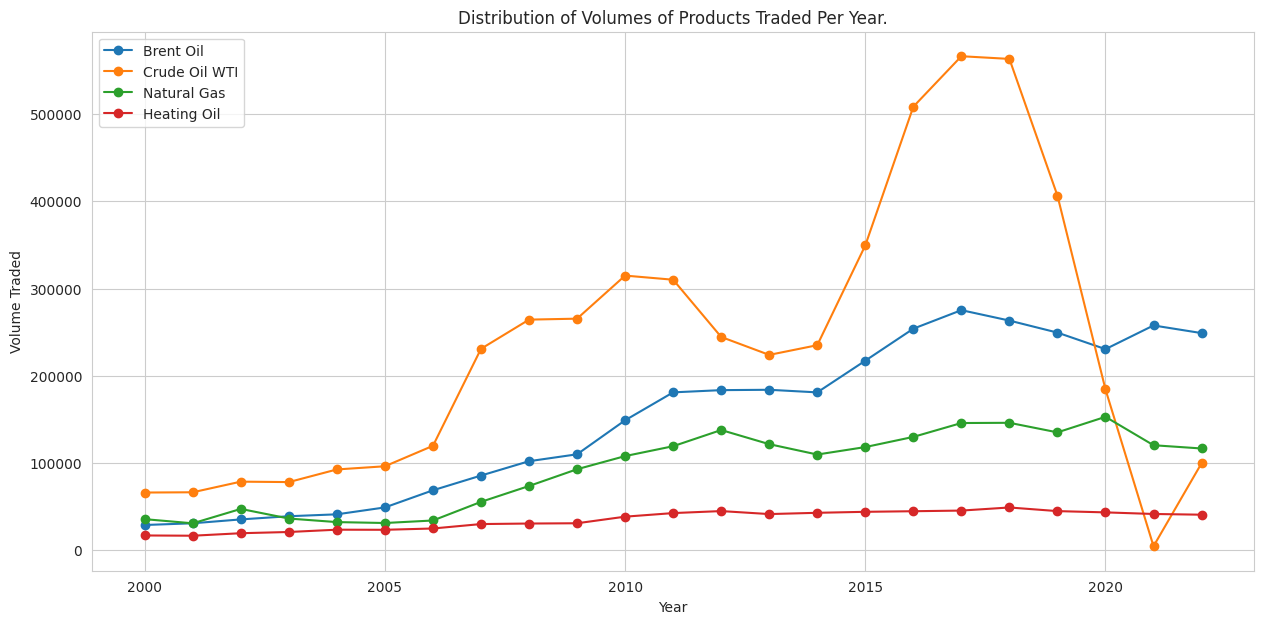

In [15]:
plt.figure(figsize=(15,7))
for prod in products:
    average_vol_per_product = product_grouping.get_group(prod).groupby("Year")["Volume"].mean().to_frame()
    plt.plot(average_vol_per_product.index, average_vol_per_product.Volume, marker ="o")
plt.xlabel("Year")
plt.ylabel("Volume Traded")
plt.title("Distribution of Volumes of Products Traded Per Year.")
plt.legend(["Brent Oil",'Crude Oil WTI', 'Natural Gas', 'Heating Oil'], loc = "upper left");

### Finding average volume per year for each product then create a dataframe to combine the data

In [16]:
brent = product_grouping.get_group("Brent Oil").groupby("Year")["Volume"].mean().to_frame(name = "Average Volume")
brent["Product"] = "Brent Oil"
brent["Year"] = brent.index

crude = product_grouping.get_group("Crude Oil WTI").groupby("Year")["Volume"].mean().to_frame(name = "Average Volume")
crude["Product"]= "Crude Oil"
crude["Year"] = crude.index

natural_gas = product_grouping.get_group("Natural Gas").groupby("Year")["Volume"].mean().to_frame(name = "Average Volume")
natural_gas["Product"]= "Natural Gas"
natural_gas["Year"] = natural_gas.index

heating_oil = product_grouping.get_group("Heating Oil").groupby("Year")["Volume"].mean().to_frame(name = "Average Volume")
heating_oil["Product"]= "Heating Oil"
heating_oil["Year"] = heating_oil.index

combined = pd.concat([brent, crude, natural_gas, heating_oil])


### Barplot of Average Volume Per Year According to Each Product

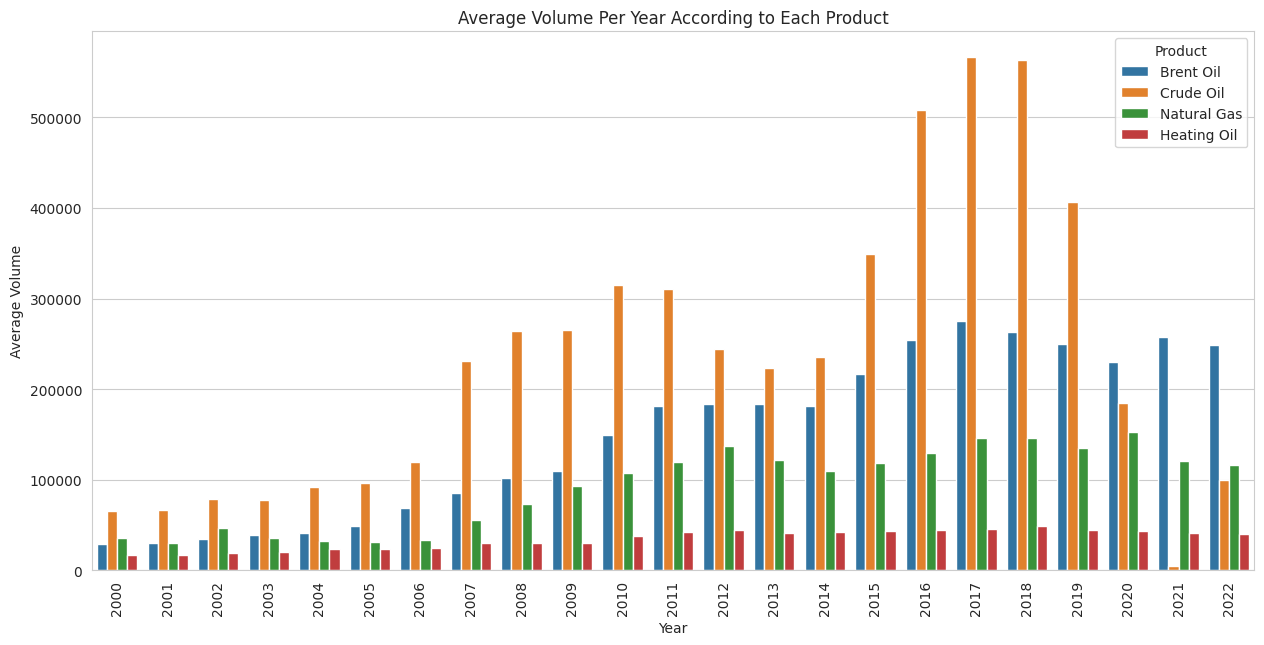

In [17]:
plt.figure(figsize=(15,7))
sns.barplot(x = combined.index, y = "Average Volume", hue = "Product", data = combined)
plt.xticks(rotation=90)
plt.ylabel("Average Volume")
plt.title("Average Volume Per Year According to Each Product");

*There are a number of interesting observations to note. First, crude oil has been the most traded commodity amongst the four until 2020 when it was overtaken by Brent Oil, experiencing its lowest in 2021 (with an average traded volume of about 4521 barrels per day). Also, it can be seen that from the initial years, there is a struggle between Brent Oil and Natural Gas for dominance. While Natural Gas had it in from 2000 to 2003, Brent Oil took over in 2003 and has since beaten Natural Gas to the fight. Heating Oil remains the least traded for obvious reasons, I believe.*

## Does the volume traded in a day affect the closing prices of products?
To answer this question, we first make scatterplots of the volume against closing price, and then calculate the correlation between the variables.

### Scatterplot of Volume Traded against Closing Prices of Products

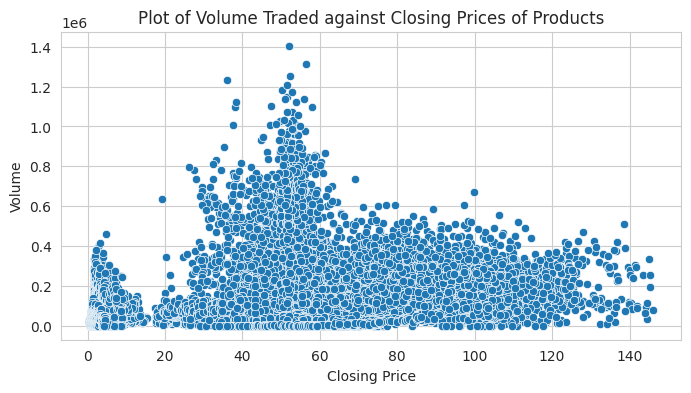

In [18]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = df["Close"], y = df["Volume"])
plt.title("Plot of Volume Traded against Closing Prices of Products")
plt.xlabel("Closing Price");

### Scatterplot of Volume Traded against Closing Prices of Products Per Product

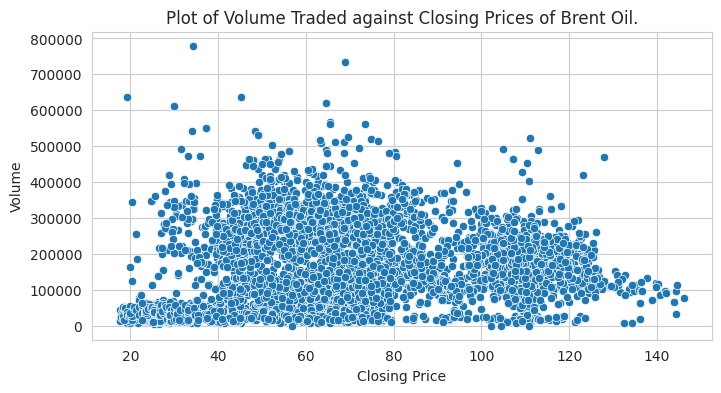

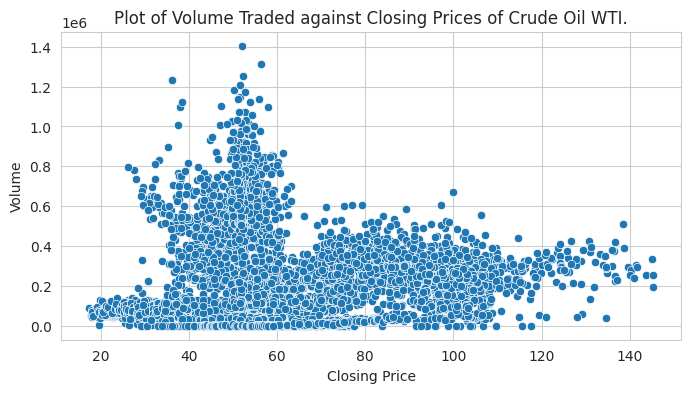

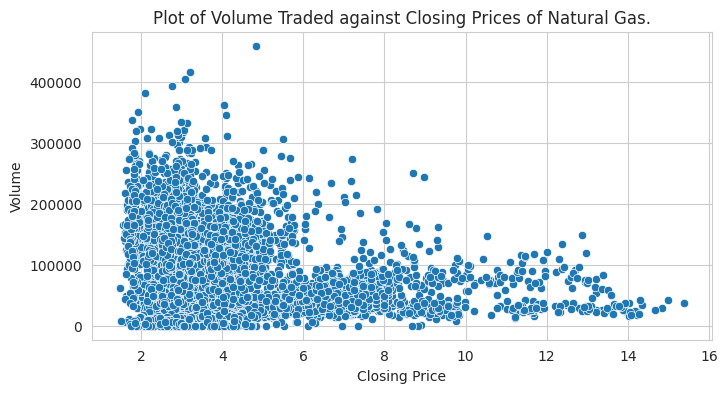

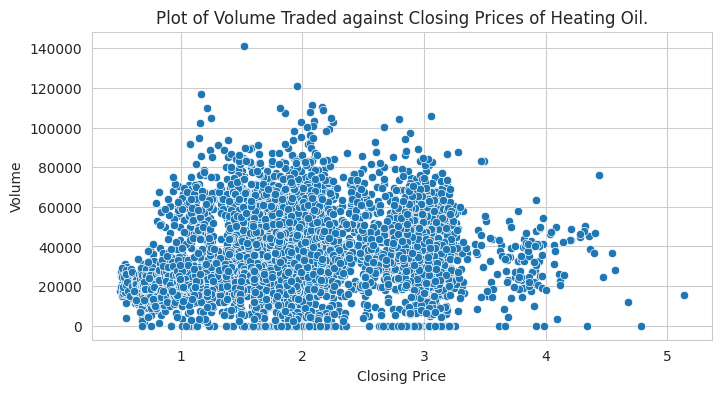

In [19]:
products = list(df["Symbol"].unique())

for prod in products:
    plt.figure(figsize=(8,4))
    data = product_grouping.get_group(prod)
    sns.scatterplot(x = data["Close"], y = data["Volume"])
    plt.title("Plot of Volume Traded against Closing Prices of " + prod + ".")
    plt.xlabel("Closing Price");

### Finding the correlation between volume traded and closing price for all products

In [20]:
prod_correlation = df["Close"].corr(df["Volume"])
prod_correlation

0.4378213284791105

### Finding the correation between volume traded and closing price for each product

In [21]:
products = list(df["Symbol"].unique())
correlations = []
for prod in products:
    data = product_grouping.get_group(prod)
    cor = data["Close"].corr(data["Volume"])
    correlations.append(cor)

correlation_matrix = pd.DataFrame(list(zip(products,correlations)), columns = ["Product","Correlation"], index = ["1","2","3","4"])
correlation_matrix

,Product,Correlation
1,Brent Oil,0.302060
2,Crude Oil WTI,0.112583
3,Natural Gas,-0.393628
4,Heating Oil,0.293481


Thus, it can be inferred that there is little association between the volumes traded and the closing price, both for the individual products and all of them combined.

### Plot of Closing Prices of Each Products

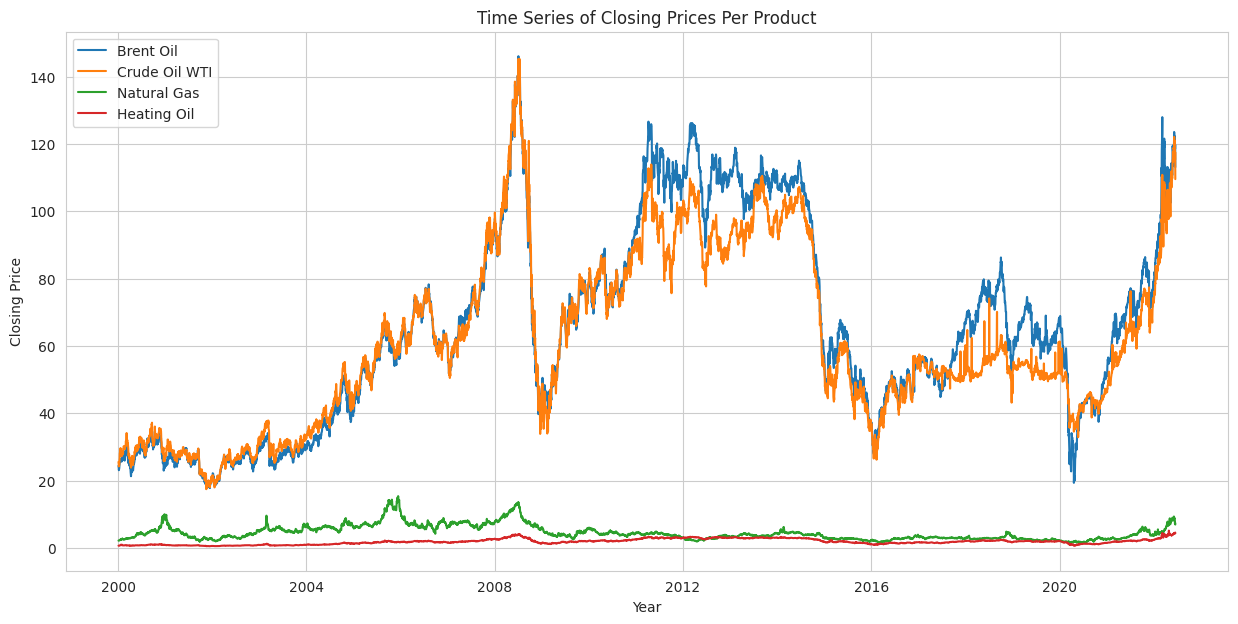

In [22]:
plt.figure(figsize = (15,7))
for prod in products:
    data = product_grouping.get_group(prod)
    plt.plot(data["Date"], data["Close"])
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Time Series of Closing Prices Per Product")
plt.legend(["Brent Oil",'Crude Oil WTI', 'Natural Gas', 'Heating Oil'], loc = "upper left");

*Thus, until about 2010, Crude Oil from WTI often had the highest prices. Following then, Brent Oil almost always remained atop. Furthermore, Heating Oil seem to have had somewhat steady prices over the years. Natural Gas, on the other hand, show a sporadic behaviour from 2000 to 2012, and then takes a journey stable movement from thenceforth.*